## Clasification
### Contents
1. cross validation
2. ML models
3. PCA
4. Conclusion

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
a = pd.read_csv('Dataset1.csv')
b = pd.read_csv('Dataset1_1.csv')
dataset1 = pd.concat([a,b])
dataset2 = pd.read_csv('Dataset2.csv')
dataset3 = pd.read_csv('Dataset3.csv')

In [3]:
dataset1.head(3)

,Mag_acc_chest_mean,Mag_acc_left_ankle_mean,Mag_gyro_left_ankle_mean,Mag_magneto_left_ankle_mean,Mag_acc_right_lower_arm_mean,Mag_gyro_right_lower_arm_mean,Mag_magneto_right_lower_arm_mean,lead1_mean,lead2_mean,Mag_acc_chest_std,...,lead2_median,Mag_acc_chest_etr,Mag_acc_left_ankle_etr,Mag_gyro_left_ankle_etr,Mag_magneto_left_ankle_etr,Mag_acc_right_lower_arm_etr,Mag_gyro_right_lower_arm_etr,Mag_magneto_right_lower_arm_etr,label,subject
0,9.799068,9.863101,1.031885,1.283169,9.756313,0.997538,0.689380,0.028886,-0.023444,0.056647,...,-0.023025,3.321904,3.321909,3.321890,3.295995,3.321917,3.321928,3.257426,1,1
1,9.777663,9.852376,1.030084,1.259505,9.760094,0.997483,0.680839,0.006279,-0.037677,0.066330,...,-0.023025,3.321895,3.321895,3.321904,3.287783,3.321921,3.321928,3.253538,1,1
2,9.767432,9.844221,1.028283,1.230792,9.777203,0.997429,0.688232,0.006279,-0.039351,0.069226,...,-0.031397,3.321892,3.321889,3.321922,3.287019,3.321892,3.321928,3.250609,1,1


In [4]:
dataset2.head(3)

,Mag_acc_chest_mean,Mag_acc_left_ankle_mean,Mag_gyro_left_ankle_mean,Mag_magneto_left_ankle_mean,Mag_acc_right_lower_arm_mean,Mag_gyro_right_lower_arm_mean,Mag_magneto_right_lower_arm_mean,lead1_mean,lead2_mean,Mag_acc_chest_std,...,lead2_median,Mag_acc_chest_etr,Mag_acc_left_ankle_etr,Mag_gyro_left_ankle_etr,Mag_magneto_left_ankle_etr,Mag_acc_right_lower_arm_etr,Mag_gyro_right_lower_arm_etr,Mag_magneto_right_lower_arm_etr,label,subject
0,9.799068,9.863101,1.031885,1.283169,9.756313,0.997538,0.689380,0.028886,-0.023444,0.056647,...,-0.023025,3.321904,3.321909,3.321890,3.295995,3.321917,3.321928,3.257426,1,1
1,9.730536,9.840348,1.031343,1.123577,9.835149,0.998946,0.955677,-0.030560,-0.068655,0.084156,...,-0.041863,3.321874,3.321886,3.321913,3.298009,3.321844,3.321921,3.162013,1,1
2,9.722070,9.835596,1.036935,1.050011,9.819929,0.999793,1.450012,-0.019257,-0.025955,0.092450,...,-0.012559,3.321863,3.321893,3.321904,3.311754,3.321790,3.321913,3.219169,1,1


In [5]:
dataset3.head(3)

,Mag_acc_chest_mean,Mag_acc_left_ankle_mean,Mag_gyro_left_ankle_mean,Mag_magneto_left_ankle_mean,Mag_acc_right_lower_arm_mean,Mag_gyro_right_lower_arm_mean,Mag_magneto_right_lower_arm_mean,lead1_mean,lead2_mean,Mag_acc_chest_std,...,lead2_median,Mag_acc_chest_etr,Mag_acc_left_ankle_etr,Mag_gyro_left_ankle_etr,Mag_magneto_left_ankle_etr,Mag_acc_right_lower_arm_etr,Mag_gyro_right_lower_arm_etr,Mag_magneto_right_lower_arm_etr,label,subject
0,9.799068,9.863101,1.031885,1.283169,9.756313,0.997538,0.689380,0.028886,-0.023444,0.056647,...,-0.023025,3.321904,3.321909,3.321890,3.295995,3.321917,3.321928,3.257426,1,1
1,9.722070,9.835596,1.036935,1.050011,9.819929,0.999793,1.450012,-0.019257,-0.025955,0.092450,...,-0.012559,3.321863,3.321893,3.321904,3.311754,3.321790,3.321913,3.219169,1,1
2,9.800284,9.812880,1.036521,1.068250,9.749735,1.000119,0.843489,0.091262,0.039771,0.077628,...,0.075353,3.321883,3.321789,3.321885,3.308699,3.321913,3.321913,3.130447,1,1


### 1. Cross validation
Subject 10 is used as a test dataset.  
Remains are used as a train & validation dataset.  

Following is how it works.
subject 1 is used as validation and others(2~9) are used as train dataset, and then take accuracy on validation.  
subject 2 is used as validation and others are used as train dataset, and then take accuracy on validation.  
subject 3 is used as validation and others are used as train dataset, and then take accuracy on validation.  
subject 4 is used as validation and others are used as train dataset, and then take accuracy on validation.  
subject 5 is used as validation and others are used as train dataset, and then take accuracy on validation.  
subject 6 is used as validation and others are used as train dataset, and then take accuracy on validation.  
subject 7 is used as validation and others are used as train dataset, and then take accuracy on validation.  
subject 8 is used as validation and others are used as train dataset, and then take accuracy on validation.  
subject 9 is used as validation and others are used as train dataset, and then take accuracy on validation.  

Average out them and record the result.  
This rule is applied to every ML model.  
A model which has the highest avaerage accuracy will predict human activity using test dataset(subject 10). 

In [6]:
testset1 = dataset1[dataset1['subject'] == 10]
testset2 = dataset2[dataset2['subject'] == 10]
testset3 = dataset3[dataset3['subject'] == 10]

In [7]:
testset1.head(3)

,Mag_acc_chest_mean,Mag_acc_left_ankle_mean,Mag_gyro_left_ankle_mean,Mag_magneto_left_ankle_mean,Mag_acc_right_lower_arm_mean,Mag_gyro_right_lower_arm_mean,Mag_magneto_right_lower_arm_mean,lead1_mean,lead2_mean,Mag_acc_chest_std,...,lead2_median,Mag_acc_chest_etr,Mag_acc_left_ankle_etr,Mag_gyro_left_ankle_etr,Mag_magneto_left_ankle_etr,Mag_acc_right_lower_arm_etr,Mag_gyro_right_lower_arm_etr,Mag_magneto_right_lower_arm_etr,label,subject
6633,9.772651,9.781933,0.989343,0.816384,9.802627,1.084885,0.866543,0.192991,0.170378,0.109666,...,-0.002093,3.321837,3.321876,3.321897,3.307859,3.321874,3.321907,3.295527,1,10
6634,9.785575,9.803993,0.989846,0.807330,9.799286,1.086241,0.774969,0.173315,0.152796,0.105256,...,-0.046049,3.321845,3.321898,3.321891,3.308320,3.321879,3.321905,3.255002,1,10
6635,9.766654,9.772622,0.991078,0.816384,9.803007,1.087597,0.718037,0.141919,0.126841,0.145879,...,-0.064888,3.321766,3.321881,3.321885,3.307859,3.321883,3.321905,3.236339,1,10


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [83]:
def cross_val(dataset, model, depth = 3):
    dataset = dataset[dataset['subject'] != 10] # remove subject 10, because it is used as testset.
    accuracy = []
    for i in range(1,10):
        X_val = dataset[dataset['subject'] == i].drop(['label','subject'],axis = 1) # validation set
        y_val = dataset[dataset['subject'] == i]['label']
        
        X_train = dataset[dataset['subject'] != i].drop(['label','subject'], axis = 1) # train set
        y_train = dataset[dataset['subject'] != i]['label']
        
        if model == 'decision_tree':
            ml_model = DecisionTreeClassifier(max_depth= depth, random_state=1)
            ml_model.fit(X_train, y_train)
            
            preds = ml_model.predict(X_val)
            
            
        elif model == 'logistic':
            ml_model = LogisticRegression()
            ml_model.fit(X_train, y_train)
            preds = ml_model.predict(X_val)
        
        elif model == 'knn':
            ml_model = KNeighborsClassifier()
            ml_model.fit(X_train, y_train)
            preds = ml_model.predict(X_val)
        
        elif model == 'lda':
            ml_model = LinearDiscriminantAnalysis()
            ml_model.fit(X_train, y_train)
            preds = ml_model.predict(X_val)
            
        elif model == 'gnb':
            ml_model = GaussianNB()
            ml_model.fit(X_train, y_train)
            preds = ml_model.predict(X_val)
            
        elif model == 'svm':        
            ml_model = SVC()
            ml_model.fit(X_train, y_train) 
            preds = ml_model.predict(X_val)            
            
        elif model == 'random_forest':
            ml_model = RandomForestClassifier(n_estimators = 100) #n_jobs=2, random_state=0
            ml_model.fit(X_train, y_train)
            preds = ml_model.predict(X_val)
            
        print('prediction completed',i)
        accuracy.append(metrics.accuracy_score(y_val, preds))
        
        
    return np.mean(accuracy), ml_model  

### 2. ML models

- 2.1 Decision tree

In [10]:
accur_decision_5, model = cross_val(dataset3,'decision_tree',5)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [11]:
accur_decision_5

0.5770937121268247

In [12]:
accur_decision_10, model = cross_val(dataset3, 'decision_tree', 10)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [13]:
accur_decision_10

0.6593471755918279

In [14]:
accur_decision_15, model =  cross_val(dataset3, 'decision_tree', 15)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [15]:
accur_decision_15

0.6574884043105386

In [71]:
accur_decision_12, model_3 = cross_val(dataset3, 'decision_tree', 12)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [17]:
accur_decision_12

0.6640031031057239

- 2.2 SVM

In [18]:
accur_svm, model = cross_val(dataset3,'svm')

c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 1


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 2


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 3


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 4


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 5


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 6


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 7


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 8


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


prediction completed 9


In [19]:
accur_svm

0.4833391190995934

- 2.3 LDA

In [20]:
accur_lda, model = cross_val(dataset3,'lda')

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [21]:
accur_lda

0.5949406552295462

- 2.4 KNN

In [22]:
accur_knn, model = cross_val(dataset3,'knn')

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [23]:
accur_knn

0.6075355498283836

- 2.5 Logistic

In [24]:
accur_logistic, model = cross_val(dataset3,'logistic')

c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 1


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 2


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 3


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 4


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 5


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 6


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 7


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 8


c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pgy\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


prediction completed 9


In [25]:
accur_logistic

0.6789197011718693

- 2.6 GNB

In [26]:
accur_gnb, model = cross_val(dataset3,'gnb')

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [27]:
accur_gnb

0.6979974417080018

- 2.7 Random forest

In [84]:
accur_forest, model_3_f = cross_val(dataset3,'random_forest')

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [85]:
accur_forest

0.7332900102028665

- 2.8 Decision tree with Dataset1,2 (Because of calculation time, they are test at last.)

In [30]:
accur_decision_5_2, model = cross_val(dataset2,'decision_tree',5)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [31]:
accur_decision_5_2

0.5748511524405276

In [32]:
accur_decision_10_2, model = cross_val(dataset2,'decision_tree',10)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [33]:
accur_decision_10_2

0.6525223133259908

In [34]:
accur_decision_15_2, model = cross_val(dataset2,'decision_tree',15)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [35]:
accur_decision_15_2

0.6578942232495925

In [70]:
accur_decision_12_2, model_2 = cross_val(dataset2,'decision_tree',12)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [37]:
accur_decision_5_1, model = cross_val(dataset2,'decision_tree',5)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [38]:
accur_decision_5_1

0.5748511524405276

In [61]:
accur_decision_5_1, model = cross_val(dataset1,'decision_tree',5)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [45]:
accur_decision_5_1

0.5756548204549501

In [40]:
accur_decision_10_1, model = cross_val(dataset1,'decision_tree',10)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [46]:
accur_decision_10_1

0.6636027846534317

In [69]:
accur_decision_15_1, model_1 = cross_val(dataset1,'decision_tree',15)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [42]:
accur_decision_15_1

0.6669743992943297

In [43]:
accur_decision_12_1, model = cross_val(dataset1,'decision_tree',12)

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [44]:
accur_decision_12_1

0.6625635098941294

In [65]:
accur_dt_d1 = [accur_decision_5_1, accur_decision_10_1, accur_decision_12_1, accur_decision_15_1]
accur_dt_d2 = [accur_decision_5_2, accur_decision_10_2, accur_decision_12_2, accur_decision_15_2]
accur_dt_d3 = [accur_decision_5, accur_decision_10, accur_decision_12, accur_decision_15]

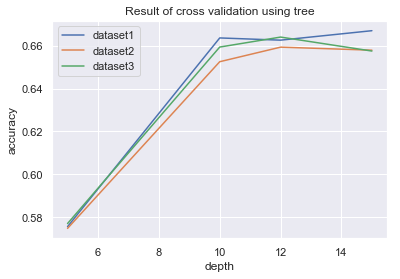

In [66]:
plt.plot([5,10,12,15],accur_dt_d1)
plt.plot([5,10,12,15],accur_dt_d2)
plt.plot([5,10,12,15],accur_dt_d3)
plt.legend(['dataset1','dataset2','dataset3'])
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('Result of cross validation using tree')
plt.show()

In [76]:
preds1 = model_1.predict(testset1.drop(['label','subject'],axis=1))
preds2 = model_2.predict(testset2.drop(['label','subject'],axis=1))
preds3 = model_3.predict(testset3.drop(['label','subject'],axis=1))

In [77]:
metrics.accuracy_score(testset1['label'], preds1)

0.8185390248258617

In [78]:
metrics.accuracy_score(testset2['label'], preds2)

0.8305361651566909

In [79]:
metrics.accuracy_score(testset3['label'], preds3)

0.8285460467870891

In [104]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [106]:
labels=[
    'Standing still',  
    'Sitting and relaxing', 
     'Lying down',
     'Walking', 
    'Climbing stairs', 
    'Waist bends forward', 
    'Frontal elevation of arms',
    'Knees bending',
    'Cycling',
    'Jogging',
    'Running',
    'Jump front & back'
]

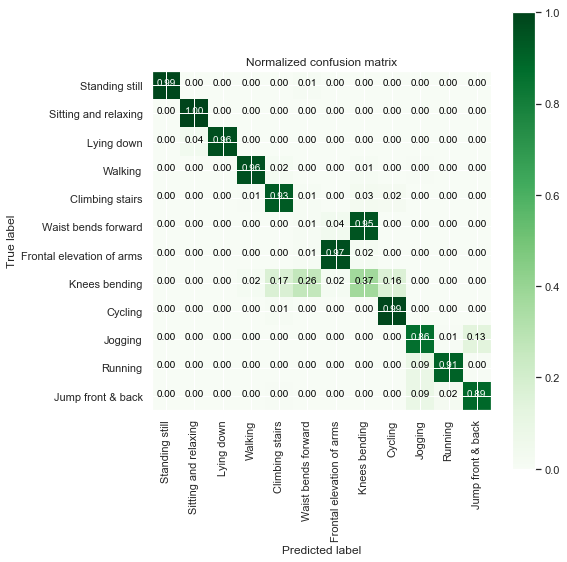

In [110]:
plt.figure(figsize=(8,8))
cm = metrics.confusion_matrix(testset2['label'],preds2)
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

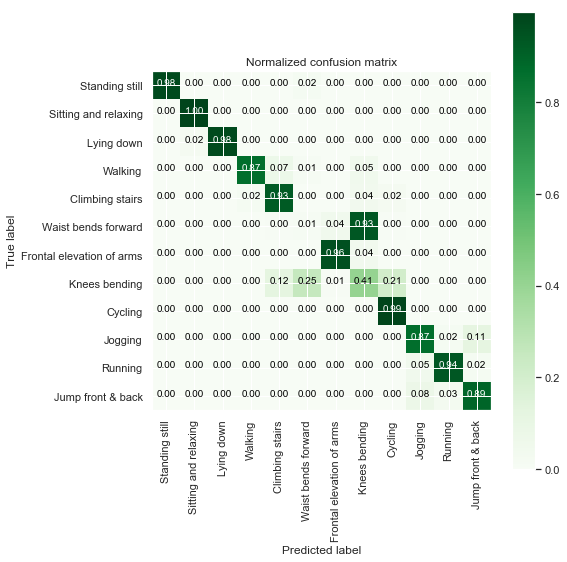

In [111]:
plt.figure(figsize=(8,8))
cm = metrics.confusion_matrix(testset3['label'],preds3)
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

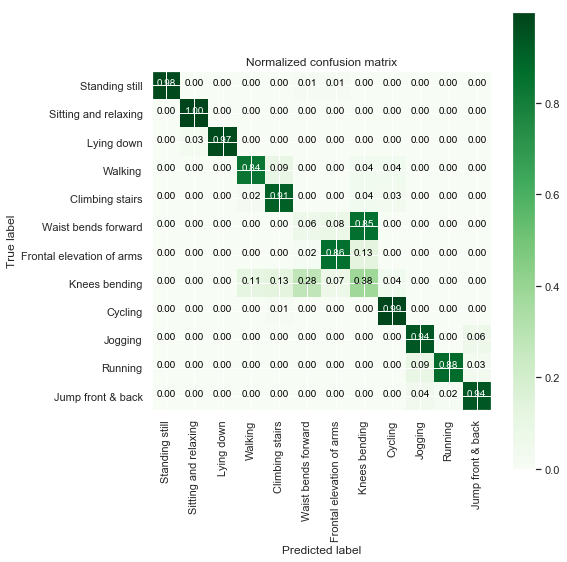

In [112]:
plt.figure(figsize=(8,8))
cm = metrics.confusion_matrix(testset1['label'],preds1)
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

In [113]:
accur_forest, model_2_f = cross_val(dataset2,'random_forest')

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [114]:
accur_forest, model_1_f = cross_val(dataset1,'random_forest')

prediction completed 1
prediction completed 2
prediction completed 3
prediction completed 4
prediction completed 5
prediction completed 6
prediction completed 7
prediction completed 8
prediction completed 9


In [115]:
preds1_f = model_1_f.predict(testset1.drop(['label','subject'],axis=1))
preds2_f = model_2_f.predict(testset2.drop(['label','subject'],axis=1))
preds3_f = model_3_f.predict(testset3.drop(['label','subject'],axis=1))

In [117]:
metrics.accuracy_score(testset1['label'], preds1_f)

0.8970947192951122

In [118]:
metrics.accuracy_score(testset2['label'], preds2_f)

0.9071736224565573

In [119]:
metrics.accuracy_score(testset3['label'], preds3_f)

0.9087947882736156

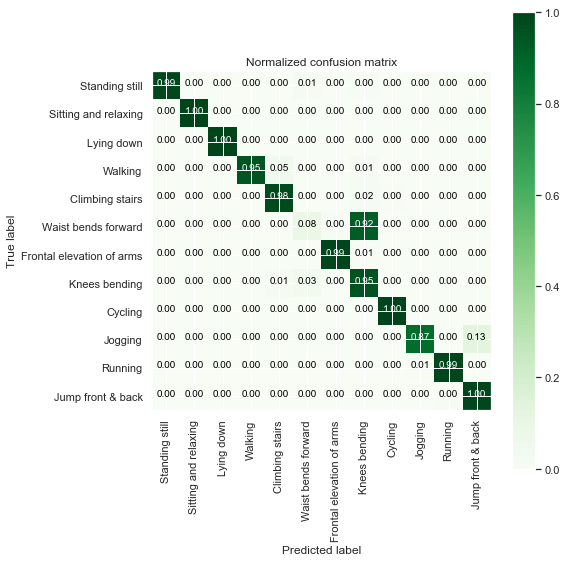

In [120]:
plt.figure(figsize=(8,8))
cm = metrics.confusion_matrix(testset2['label'],preds2_f)
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

### PCA (feed back)
Decision tree and random forest don't predict waist bending, instead predict knees bending.  
So I used PCA to display their distribution.

In [25]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [26]:
dataset3 = pd.read_csv('Dataset3.csv')

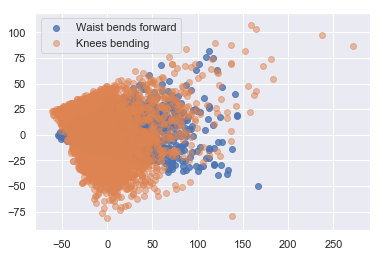

In [40]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
w_projected = pca.fit_transform(dataset3[dataset3['label'] == 6].drop(['subject','label'],axis = 1))
k_projected = pca.fit_transform(dataset3[dataset3['label'] == 8].drop(['subject','label'],axis = 1))

plt.scatter(w_projected[:,0], w_projected[:,1], alpha = 0.8)
plt.scatter(k_projected[:,0], k_projected[:,1], alpha = 0.5)
plt.legend(['Waist bends forward', 'Knees bending'])
plt.show()

A lot of elements are overlapped each other.  
Of course, real distribution of them may be different, but important thing is that model can't predict difference between them.  
Therefore, I think their distribution is similiar.

### 8. Conclusion
 1. When decision tree is used, dataset2 is the best.
 2. From dataset3, the best model is random forest
 3. When random forest is used, dataset3 is the best. 
 4. The best model fail to predict waist bending, instead predict knees bending.